In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [63]:
## archive_5_dummy_df.groupby("Sex").get_group("Male")

In [11]:
# read and extract data from GEO data archive
archive_5_dummy_df = pd.read_excel('All_5_GPL570_GEO_Data_AML_With_Healthy_Archive_Filtered.xlsx')
dummy_IDRef_Study_geo_accession_Sample_platform_id = pd.DataFrame(np.column_stack(
    [np.array(archive_5_dummy_df["ID_REF"]),
     np.array(archive_5_dummy_df["Study_geo_accession"]),
     np.array(archive_5_dummy_df["Disease_state"])]))

In [12]:
dummy_IDRef_Study_geo_accession_Sample_platform_id.head()

,0,1,2
0,GSM2884491,GSE107968,AML
1,GSM2884492,GSE107968,AML
2,GSM2884499,GSE107968,Healthy
3,GSM1664972,GSE68172,AML
4,GSM1664976,GSE68172,AML


In [13]:
dummy_IDRef_Study_geo_accession_Sample_platform_id.columns = ['ID_REF', 'DataSets ID','Actual AML disease state']

dummy_IDRef_Study_geo_accession_Sample_platform_id = dummy_IDRef_Study_geo_accession_Sample_platform_id.set_index('ID_REF')

In [14]:
print(dummy_IDRef_Study_geo_accession_Sample_platform_id.shape)
dummy_IDRef_Study_geo_accession_Sample_platform_id.head()

(613, 2)


,DataSets ID,Actual AML disease state
ID_REF,,
GSM2884491,GSE107968,AML
GSM2884492,GSE107968,AML
GSM2884499,GSE107968,Healthy
GSM1664972,GSE68172,AML
GSM1664976,GSE68172,AML


In [19]:
dummy_IDRef_Study_geo_accession_Sample_platform_id_0AML_1Healthy = dummy_IDRef_Study_geo_accession_Sample_platform_id.replace({'Actual AML disease state' : { 'AML' : 0, 'AML ' : 0, 'Healthy' :1}})

In [20]:
print(dummy_IDRef_Study_geo_accession_Sample_platform_id_0AML_1Healthy.shape)
dummy_IDRef_Study_geo_accession_Sample_platform_id_0AML_1Healthy.head()

(613, 2)


,DataSets ID,Actual AML disease state
ID_REF,,
GSM2884491,GSE107968,0
GSM2884492,GSE107968,0
GSM2884499,GSE107968,1
GSM1664972,GSE68172,0
GSM1664976,GSE68172,0


In [21]:
for i in dummy_IDRef_Study_geo_accession_Sample_platform_id_0AML_1Healthy['Actual AML disease state']:
    print(i,end=" ")

0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [32]:
result_from_Classifica = pd.read_csv("knn_model_30knn_p4_testing copy.csv")
result_from_Classifica.index.name='ID_REF'
result_from_Classifica.columns = ['Predicted AML disease state']

In [34]:
print(result_from_Classifica.shape)
result_from_Classifica.head()

(613, 1)


,Predicted AML disease state
ID_REF,
GSM2884491,0
GSM2884492,0
GSM2884499,0
GSM1664972,0
GSM1664976,1


In [35]:
pwedictaed = pd.concat([dummy_IDRef_Study_geo_accession_Sample_platform_id_0AML_1Healthy, result_from_Classifica], axis=1, join='inner')

In [55]:
pwedictaed = pwedictaed.drop("DataSets ID",1)

In [58]:
pwedictaed.head()

,Actual AML disease state,Predicted AML disease state
ID_REF,,
GSM2884491,0,0
GSM2884492,0,0
GSM2884499,1,0
GSM1664972,0,0
GSM1664976,0,1


In [57]:
pwedictaed.to_csv("Predected_AML_0_vs_Healthy_1_using_974_probsets_and_613_dummy_data_for_testing_2761_for_training_KNN_model_n_neighbor30_leaf_size30_p4.csv", encoding='utf-8', index=True)

In [59]:
pwedictaed.head()

,Actual AML disease state,Predicted AML disease state
ID_REF,,
GSM2884491,0,0
GSM2884492,0,0
GSM2884499,1,0
GSM1664972,0,0
GSM1664976,0,1


In [60]:
significant_probesets_list = np.column_stack([np.array(pwedictaed.index),
                                              np.array(pwedictaed["Actual AML disease state"]),
                                              np.array(pwedictaed["Predicted AML disease state"])]).tolist()

In [61]:
predicted_true_df = pd.DataFrame(columns=["Array", "Actual AML disease state", "Predicted AML disease state"])
predicted_false_df = pd.DataFrame(columns=["Array", "Actual AML disease state", "Predicted AML disease state"])

In [62]:
for i in significant_probesets_list:
    if i[1] == i[2]:
        predicted_true_df = predicted_true_df.append({'Array': i[0], "Actual AML disease state": i[1], "Predicted AML disease state": i[2]}, ignore_index=True)
    else:
        predicted_false_df = predicted_false_df.append({'Array': i[0], "Actual AML disease state": i[1], "Predicted AML disease state": i[2]}, ignore_index=True)

In [64]:
aa = predicted_true_df.set_index("Array")
aa

,Actual AML disease state,Predicted AML disease state
Array,,
GSM2884491,0,0
GSM2884492,0,0
GSM1664972,0,0
GSM1664980,0,0
GSM1664983,0,0
GSM1664986,0,0
GSM1664990,0,0
GSM1664994,0,0
GSM1664998,0,0


In [65]:
print(predicted_true_df.shape)
print((predicted_true_df.shape[0]/613)*100)
predicted_true_df.head()

(562, 3)
91.68026101141925


,Array,Actual AML disease state,Predicted AML disease state
0,GSM2884491,0,0
1,GSM2884492,0,0
2,GSM1664972,0,0
3,GSM1664980,0,0
4,GSM1664983,0,0


In [66]:
print(predicted_false_df.shape)
print((predicted_false_df.shape[0]/613)*100)
predicted_false_df.head()

(51, 3)
8.31973898858075


,Array,Actual AML disease state,Predicted AML disease state
0,GSM2884499,1,0
1,GSM1664976,0,1
2,GSM1665044,1,0
3,GSM1665045,1,0
4,GSM1665046,1,0


In [68]:
tn, fp, fn, tp = confusion_matrix(pwedictaed["Actual AML disease state"].tolist(), pwedictaed["Predicted AML disease state"].tolist()).ravel()

In [69]:
tn, fp, fn, tp

(422, 33, 18, 140)

In [39]:
cm = [[422, 33],[18 ,140]]
cm2 = [[455,158],[440,173]]

In [40]:
for i in range(2):
    for j in range(2):
        print(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    

0 0 TN = 422
1 0 FP = 33
0 1 FN = 18
1 1 TP = 140


In [44]:
for i in range(2):
    for j in range(2):
        print(j+2,i, str(cm2[i][j]))
    

2 0 455
3 0 158
2 1 440
3 1 173


<Figure size 720x720 with 0 Axes>

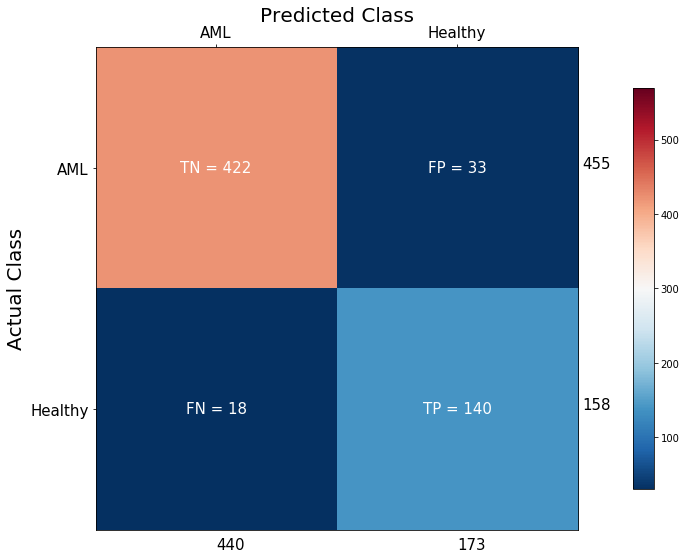

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
os.chdir('/Volumes/RaMain/LabNotebooks_Raeuf/PhD Project/PhDThesis/Scientific_Reports/Paper_AfterReviews')

fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 10  
fig_size[1] = 10
# plt.rcParams.update({'font.size': 50})

plt.figure()


# plt.clf()
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap("RdBu_r"), vmin=30, vmax=570)
classNames = ['AML','Healthy']
# plt.title('AML Prediction - KNN Confusion Matrix')
plt.ylabel('Actual Class',fontsize=20)



plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.xlabel('Predicted Class' ,fontsize=20)


tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=15, rotation=0)
plt.yticks(tick_marks, classNames,fontsize=15)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15,ha='center', va='center',color="w")

plt.text(1.52,0, "455",fontsize=15)
plt.text(1.52,1, "158",fontsize=15)
plt.text(0,1.58, "440",fontsize=15)
plt.text(1,1.58, "173",fontsize=15)

ax.xaxis.set_label_position('top') 



fig.colorbar(im, fraction=0.036, pad=0.1)


title = "AML Prediction of 613 Samples From 5 Gene Expression Datasets - KNN Confusion Matrix.png"


plt.savefig(title,bbox_inches='tight')
plt.show() 
